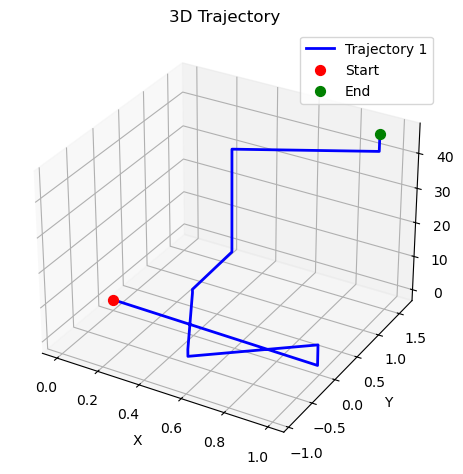

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1.0                   # Diffusion coefficient
n_particles = 1      # Number of particles
n_steps = 50             # Number of time steps
dt = 0.01                 # Time step size              
sigma = np.sqrt(2 * D * dt)

# Initialize particles at center
positions = np.zeros((n_particles, n_steps, 3))
def gas(a):
    return 1 / (a[0]**2 + a[1]**2 + a[2]**2 + 0.001)
grammage = 0
# Perform the random walk
for i in range(1, n_steps):
    temp = np.random.uniform(0,1)     
    if temp < 0.1:          # probability to scatter
        dx, dy, dz = 1.0, 1.0, 1.0
        while dx**2 + dy**2 + dz**2 > 1:
            dx, dy, dz = np.random.uniform(-1,1,3) 
        dr = (dx**2 + dy**2 + dz**2)**0.5
        positions[:,i] = positions[:, i-1] + np.array([dx/dr, dy/dr, dz/dr])
        
    else:                   # particle does not scatter
        positions[:,i] = positions[:, i-1] + np.array([0,0,1])
    grammage += gas(positions[0,i])*sigma
    
ax = plt.figure().add_subplot(projection='3d')
x0 = positions[0,:,0]
y0 = positions[0,:,1]
z0 = positions[0,:,2]

ax.plot(x0, y0, z0, color='blue', linewidth=2, label='Trajectory 1')

ax.scatter(x0[0], y0[0], z0[0], color='red', s=50, label='Start')
ax.scatter(x0[-1], y0[-1], z0[-1], color='green', s=50, label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory')
ax.legend()
plt.tight_layout()
plt.show()

In [85]:
grammage

0.295942184798684

In [137]:
a = np.random.uniform(0,1,300) 
b = a.reshape((3,100))
c = np.sum(b**2, axis=0)
ind = np.where(c < 1)
ind

(array([ 1,  3,  5,  7, 12, 14, 17, 19, 24, 25, 27, 28, 29, 30, 32, 34, 35,
        37, 39, 40, 41, 43, 44, 46, 47, 48, 49, 51, 53, 56, 57, 59, 60, 61,
        62, 65, 67, 70, 72, 73, 74, 75, 77, 79, 81, 83, 84, 85, 87, 88, 89,
        93, 94, 95, 97, 98]),)

In [151]:
len(ind[0])

56

In [123]:
b[:,2]

array([0.90960126, 0.05715572, 0.68288026])

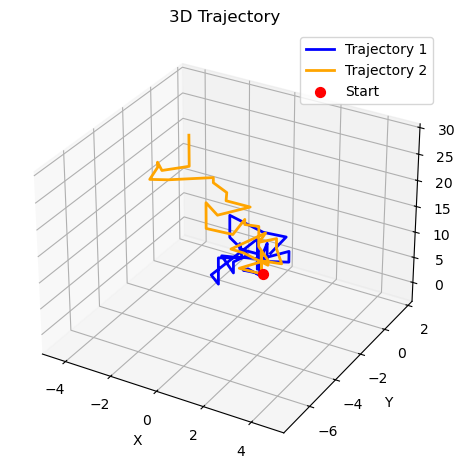

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1.0                   # Diffusion coefficient
n_particles = 1000      # Number of particles
n_steps = 50             # Number of time steps
dt = 1                 # Time step size              
sigma = np.sqrt(2 * D * dt)

# Initialize particles at center
positions = np.zeros((n_particles, n_steps, 3))
velocities = np.zeros((n_particles, 3))

def gas(a):
    return 1 / (a[0]**2 + a[1]**2 + a[2]**2 + 0.001)
grammage = np.zeros(n_particles)

# Perform the random walk
for i in range(1, n_steps):
    temp = np.random.uniform(0,1,n_particles)     
    ind_scatter = np.where(temp < dt / D)          # probability to scatter
    ind_noscatter = np.where(temp >= dt / D) 
    
    len_scatter = len(ind_scatter[0])           # index of scattered particles
    len_noscatter = len(ind_noscatter[0])       # index of unscattered particles
    random_no = np.random.uniform(-1, 1, 3*len_scatter*5) # random walk 
    random_temp = random_no.reshape((3, len_scatter*5))   # random walk in 3 directions
    dr2 = np.sum(random_temp**2, axis=0)
    ind_sphere = np.where(dr2 < 1)            # random vector within s aphere
    dr = dr2[ind_sphere[0][:len_scatter]]     # random walk length
    dx, dy, dz = random_temp[:,ind_sphere[0][:len_scatter]] # random walk in 3 axes
    
    positions[ind_scatter,i] = positions[ind_scatter, i-1] + np.array([dx/dr, dy/dr, dz/dr]).T  # scattered particle position after this time step
        
    positions[ind_noscatter,i] = positions[ind_noscatter, i-1] + np.array([0,0,1])              # unscattered particle position after this time step
    
    grammage += sigma / np.sum(positions[:,i]**2,axis=1)                                        # grammage of particles after this time step


ax = plt.figure().add_subplot(projection='3d')
x0, y0, z0 = positions[0,:,0], positions[0,:,1], positions[0,:,2]
x1, y1, z1 = positions[1,:,0], positions[1,:,1], positions[1,:,2]

ax.plot(x0, y0, z0, color='blue', linewidth=2, label='Trajectory 1')
ax.plot(x1, y1, z1, color='orange', linewidth=2, label='Trajectory 2')

ax.scatter(x0[0], y0[0], z0[0], color='red', s=50, label='Start')
# ax.scatter(x0[-1], y0[-1], z0[-1], color='green', s=50, label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory')
ax.legend()
plt.tight_layout()
plt.show()

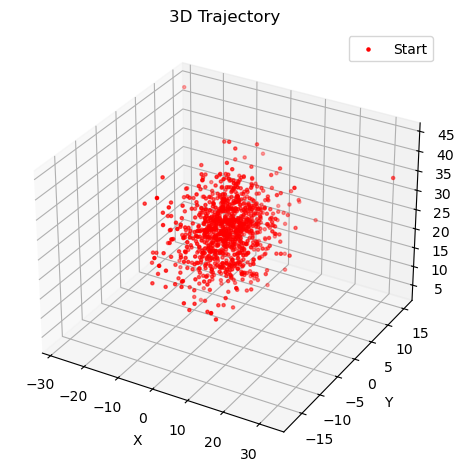

In [269]:
ax = plt.figure().add_subplot(projection='3d')

x_end = positions[:,-1, 0]
y_end = positions[:,-1, 1]
z_end = positions[:,-1, 2]
ax.scatter(x_end, y_end, z_end, color='red', s=5, label='Start')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory')
ax.legend()
plt.tight_layout()
plt.show()

In [275]:
random_no = np.random.uniform(-1, 1, 3*n_particles*5) # random walk 
random_no.shape

(15000,)

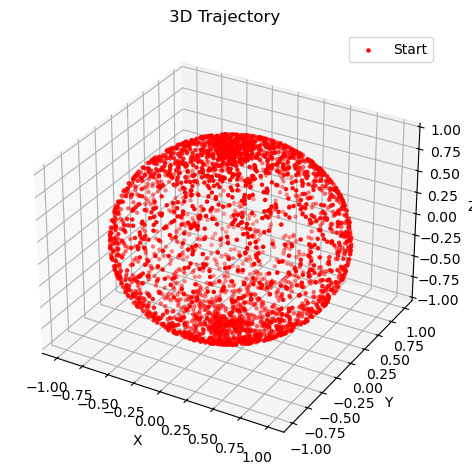

In [289]:
theta = np.random.uniform(0, np.pi, 3*n_particles)
phi = np.random.uniform(0, np.pi*2, 3*n_particles)
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x, y, z, color='red', s=5, label='Start')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory')
ax.set_zlim(-1,1)
ax.legend()
plt.tight_layout()
plt.show()

In [283]:
x.shape

(3000,)

In [225]:
dy/dr

array([0.91854178])

In [347]:
np.sum(positions[:,2]**2,axis=1)

array([3.80057938e-01, 3.62202769e+00, 6.84411855e-01, 2.73585412e-01,
       2.91444186e+00, 2.19156688e+00, 2.88372781e+00, 3.64810294e+00,
       3.35819749e+00, 1.91335901e+00, 3.63024524e+00, 2.89279336e+00,
       3.33848838e+00, 2.19550104e+00, 3.00179598e+00, 2.35758042e+00,
       2.00702779e-02, 2.09834054e+00, 3.16141478e+00, 2.14633833e+00,
       3.85453239e+00, 3.78494901e+00, 2.18108858e+00, 3.57928564e+00,
       2.24293027e+00, 1.57803778e+00, 5.02918877e-01, 1.19244070e+00,
       3.94298395e+00, 1.74919017e+00, 2.32737580e+00, 3.67021943e-02,
       3.00851848e+00, 1.10429761e+00, 2.08025997e+00, 2.18954474e+00,
       9.13751906e-01, 3.49773648e+00, 3.23386388e+00, 3.07868464e+00,
       1.40513452e+00, 1.07377398e+00, 7.76515851e-01, 7.29309322e-01,
       1.97089633e+00, 1.36851489e+00, 1.46133045e+00, 4.74582210e-01,
       3.94813033e+00, 2.61280929e+00, 1.33353062e+00, 1.47973458e+00,
       2.05456168e+00, 6.41147036e-03, 7.64785641e-01, 4.97768836e-01,
      

In [181]:
sum2

array([1.65222631, 0.4476638 , 0.65957094, 0.93358413, 0.81960204])

In [201]:
dx, dy, dz = random_temp[:,ind_sphere[0]]
dx

array([ 0.55875006, -0.4532768 , -0.21184401,  0.04301156])

In [513]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
Dl = 0.1                   # Diffusion length scale 0.1 pc
n_particles = 10000      # Number of particles
n_steps = 100             # Number of time steps
dt = 1000                 # Time step year   
sigma = np.sqrt(2 * D * dt)

sigma_C = 255e-27  # cm^2
c_cms = 3e10 # speed of light in cm s^-1
c_pcyr = 0.307 # speed of light in pc yr ^-1
grammage = np.zeros(n_particles)

# Initialize particles at center
positions = np.zeros((n_particles, n_steps, 3))

# Initial velocity vectors of particles
c_theta_v = np.random.uniform(-1.0, 1.0, n_particles)
s_theta_v = np.sqrt(1.0-c_theta_v**2.0)

phi_v = np.random.uniform(0, np.pi*2, n_particles)
vx = s_theta_v*np.cos(phi_v)
vy = s_theta_v*np.sin(phi_v)
vz = c_theta_v

decay_flag = np.zeros(n_particles)

t1 = time.time()
# Perform the random walk
for i in range(1, n_steps): # time loop
    r2 = np.sum(positions[:,2]**2,axis=1)
    nH = 1 / (1 + r2)**1.5        # broken powerlaw gas distribution cm^{-3}
    grammage += c*dt * nH   # grammage of particles after this time step

    t_decay = 1.0 / (c * sigma_C * nH) / 3.15e7
    
    p_scatter = np.random.uniform(0,1,n_particles) # random no. to check if scatters
    p_decay = np.random.uniform(0,1,n_particles) # random no. to check it decays
    
    ind_scatter = np.where(p_scatter < c_pcyr*dt / Dl)          # probability to scatter
    ind_noscatter = np.where(p_scatter >= c_pcyr*dt / Dl) 
    
    ind_decay = np.where(p_decay < dt / t_decay)          # probability to scatter
    decay_flag[ind_decay] += 1  
    
    n_scatter = len(ind_scatter[0])           # index of scattered particles
    n_noscatter = len(ind_noscatter[0])       # index of unscattered particles

    c_theta_v_temp = np.random.uniform(-1.0, 1.0, n_scatter)
    s_theta_v_temp = np.sqrt(1.0-c_theta_v_temp**2.0)

    phi_v_temp = np.random.uniform(0, np.pi*2, n_scatter)
    vx[ind_scatter] = s_theta_v_temp*np.cos(phi_v_temp)
    vy[ind_scatter] = s_theta_v_temp*np.sin(phi_v_temp)
    vz[ind_scatter] = c_theta_v_temp

    positions[:,i] = positions[:, i-1] + np.array([vx, vy, vz]).T * dt   # particle position after this time step
            

t2 = time.time()
print(t2-t1)
# ax = plt.figure().add_subplot(projection='3d')
# x0, y0, z0 = positions[0,:,0], positions[0,:,1], positions[0,:,2]
# x1, y1, z1 = positions[1,:,0], positions[1,:,1], positions[1,:,2]
# x2, y2, z2 = positions[2,:,0], positions[2,:,1], positions[2,:,2]

# ax.plot(x0, y0, z0, color='blue', linewidth=2, label='Trajectory 0')
# ax.plot(x1, y1, z1, color='orange', linewidth=2, label='Trajectory 1')
# ax.plot(x2, y2, z2, color='yellow', linewidth=2, label='Trajectory 2')

# ax.scatter(x0[0], y0[0], z0[0], color='red', s=50, label='Start')
# # ax.scatter(x0[-1], y0[-1], z0[-1], color='green', s=50, label='End')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('3D Trajectory')
# ax.legend()
# plt.tight_layout()
# plt.show()

0.09603691101074219


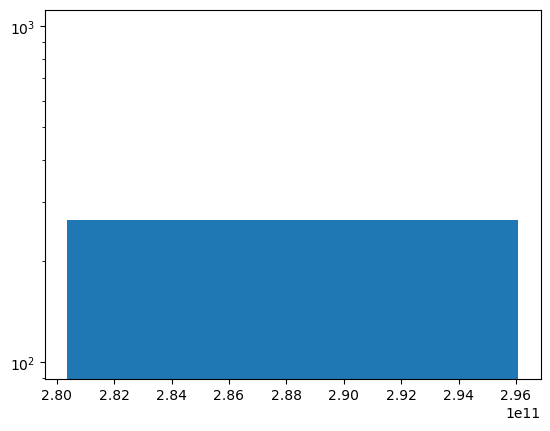

In [507]:
x_end = positions[:,-1, 0]
y_end = positions[:,-1, 1]
z_end = positions[:,-1, 2]

dr2_end = (x_end - 1.0)**2 + y_end**2 + z_end**2

ind = np.where(dr2_end < 0.1)

plt.hist(grammage[ind],bins=1)
# plt.xscale("log")
plt.yscale("log")

In [475]:
len(ind[0])

154

In [377]:
plt.hist(grammage, bins=100)
plt.xscale("log")
plt.yscale("log")
plt.xlim(4e3,1e4)
plt.xlabel("Grammage")
plt.ylabel("Particle number")

3e+17

In [305]:
np.max(grammage)

2616.3591121654836

In [307]:
np.min(grammage)

3.0833704672036957

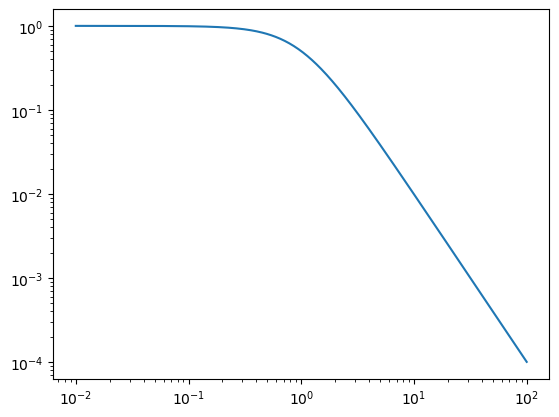

In [339]:
r = np.logspace(-2,2,400)
y = 1 / (1 + r**2)
plt.plot(r,y)
plt.xscale("log")
plt.yscale("log")

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
Dl = 0.1                   # Diffusion length scale 0.1 pc ~ D = 1e28 cm^2 / s
n_particles = 1000000      # Number of particles
n_steps = 1000             # Number of time steps
dt = 1000                 # Time step year   

sigma_C = 255e-27  # cm^2
c_cms = 3e10 # speed of light in cm s^-1
c_pcyr = 0.307 # speed of light in pc yr ^-1
grammage = np.zeros(n_particles)

# Initialize particles at center
positions = np.zeros((n_particles, 3))

# Initial velocity vectors of particles
c_theta_v = np.random.uniform(-1.0, 1.0, n_particles)
s_theta_v = np.sqrt(1.0-c_theta_v**2.0)

phi_v = np.random.uniform(0, np.pi*2, n_particles)
vx = s_theta_v*np.cos(phi_v)
vy = s_theta_v*np.sin(phi_v)
vz = c_theta_v

decay_flag = np.zeros(n_particles)

t1 = time.time()
# Perform the random walk
for i in range(1, n_steps): # time loop
    r2 = np.sum(positions**2,axis=1)
    nH = 1 / (1 + r2)**1.5        # broken powerlaw gas distribution cm^{-3}
    grammage += c_pcyr*dt * nH   # grammage of particles after this time step

    t_decay = 1.0 / (c_pcyr * sigma_C * nH) / 3.15e7
    
    p_scatter = np.random.uniform(0,1,n_particles) # random no. to check if scatters
    p_decay = np.random.uniform(0,1,n_particles) # random no. to check it decays
    
    ind_scatter = np.where(p_scatter < c_pcyr*dt / Dl)          # probability to scatter
    ind_noscatter = np.where(p_scatter >= c_pcyr*dt / Dl) 
    
    ind_decay = np.where(p_decay < dt / t_decay)          # probability to scatter
    decay_flag[ind_decay] += 1  
    
    n_scatter = len(ind_scatter[0])           # index of scattered particles

    c_theta_v_temp = np.random.uniform(-1.0, 1.0, n_scatter)
    s_theta_v_temp = np.sqrt(1.0-c_theta_v_temp**2.0)

    phi_v_temp = np.random.uniform(0, np.pi*2, n_scatter)
    vx[ind_scatter] = s_theta_v_temp*np.cos(phi_v_temp)
    vy[ind_scatter] = s_theta_v_temp*np.sin(phi_v_temp)
    vz[ind_scatter] = c_theta_v_temp

    positions = positions + np.array([vx, vy, vz]).T * c_pcyr * dt   # particle position after this time step
            

t2 = time.time()
print(t2-t1)
# ax = plt.figure().add_subplot(projection='3d')
# x0, y0, z0 = positions[0,:,0], positions[0,:,1], positions[0,:,2]
# x1, y1, z1 = positions[1,:,0], positions[1,:,1], positions[1,:,2]
# x2, y2, z2 = positions[2,:,0], positions[2,:,1], positions[2,:,2]

# ax.plot(x0, y0, z0, color='blue', linewidth=2, label='Trajectory 0')
# ax.plot(x1, y1, z1, color='orange', linewidth=2, label='Trajectory 1')
# ax.plot(x2, y2, z2, color='yellow', linewidth=2, label='Trajectory 2')

# ax.scatter(x0[0], y0[0], z0[0], color='red', s=50, label='Start')
# # ax.scatter(x0[-1], y0[-1], z0[-1], color='green', s=50, label='End')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('3D Trajectory')
# ax.legend()
# plt.tight_layout()
# plt.show()

50.79856777191162


Text(0, 0.5, '$\\frac{dN}{dr}dr$')

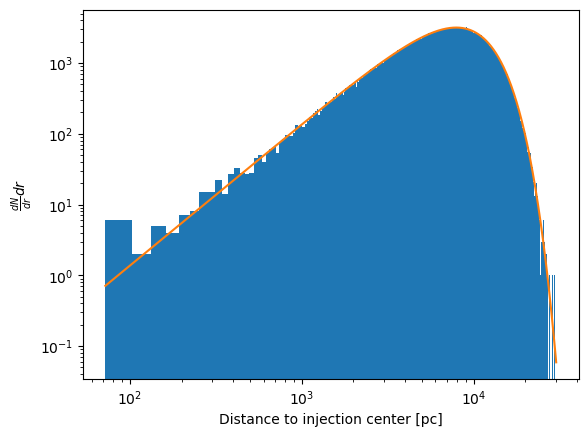

In [126]:
r2 = np.sum(positions**2,axis=1)**0.5
profile = plt.hist(r2,bins=1000)
t_tot = dt * n_steps
D = (c_pcyr * dt)**2 / 6 / dt
dr = np.diff(profile[1][:-1])[0]
norm = 1e6 * (4*np.pi)**-0.5* (D*t_tot)**-1.5 * dr
r_m = profile[1][:-1]
y_m = norm*r_m**2*np.e**(-r_m**2 / (4*D*t_tot) )
plt.plot(r_m, y_m)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance to injection center [pc]")
plt.ylabel(r"$\frac{dN}{dr}dr$")

Text(0, 0.5, '$\\frac{dN}{dr}dr$')

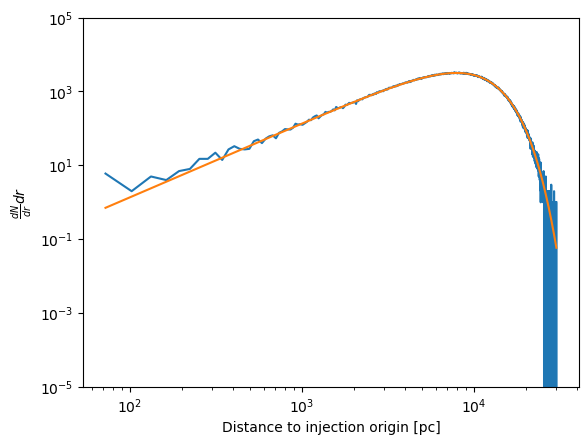

In [122]:
plt.plot(profile[1][:-1],profile[0])
t_tot = dt * n_steps
D = (c_pcyr * dt)**2 / 6 / dt
dr = np.diff(profile[1][:-1])[0]
norm = 1e6 * (4*np.pi)**-0.5* (D*t_tot)**-1.5 * dr
r_m = profile[1][:-1]
y_m = norm*r_m**2*np.e**(-r_m**2 / (4*D*t_tot) )
plt.plot(r_m, y_m)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-5,1e5)
plt.xlabel("Distance to injection origin [pc]")
plt.ylabel(r"$\frac{dN}{dr}dr$")

In [138]:
D = (c_pcyr * dt)**2 / 6 / dt
D * (3e18)**2 / 3.15e7

4.488047619047619e+30

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
Dl = 0.1                   # Diffusion length scale 0.1 pc ~ D = 1e28 cm^2 / s
n_particles = 100000      # Number of particles
n_steps = 1000             # Number of time steps
dt = 1000                 # Time step year   

sigma_C = 255e-27  # cm^2
c_cms = 3e10 # speed of light in cm s^-1
c_pcyr = 0.307 # speed of light in pc yr ^-1
grammage = np.zeros(n_particles)

# Initialize particles at center
positions = np.zeros((n_particles, 3))

# Initial velocity vectors of particles
c_theta_v = np.random.uniform(-1.0, 1.0, n_particles)
s_theta_v = np.sqrt(1.0-c_theta_v**2.0)

phi_v = np.random.uniform(0, np.pi*2, n_particles)
vx = s_theta_v*np.cos(phi_v)
vy = s_theta_v*np.sin(phi_v)
vz = c_theta_v

decay_flag = np.zeros(n_particles)

t1 = time.time()
# Perform the random walk
for i in range(1, n_steps): # time loop
    r2 = np.sum(positions**2,axis=1)
    nH = 1 / (1 + r2)**1.5        # broken powerlaw gas distribution cm^{-3}
    grammage += c_pcyr*dt * nH   # grammage of particles after this time step

    t_decay = 1.0 / (c_pcyr * sigma_C * nH) / 3.15e7
    
    p_scatter = np.random.uniform(0,1,n_particles) # random no. to check if scatters
    p_decay = np.random.uniform(0,1,n_particles) # random no. to check it decays
    
    ind_scatter = np.where(p_scatter < c_pcyr*dt / Dl)          # probability to scatter
    ind_noscatter = np.where(p_scatter >= c_pcyr*dt / Dl) 
    
    ind_decay = np.where(p_decay < dt / t_decay)          # probability to scatter
    decay_flag[ind_decay] += 1  
    
    n_scatter = len(ind_scatter[0])           # index of scattered particles

    c_theta_v_temp = np.random.uniform(-1.0, 1.0, n_scatter)
    s_theta_v_temp = np.sqrt(1.0-c_theta_v_temp**2.0)

    phi_v_temp = np.random.uniform(0, np.pi*2, n_scatter)
    vx[ind_scatter] = s_theta_v_temp*np.cos(phi_v_temp)
    vy[ind_scatter] = s_theta_v_temp*np.sin(phi_v_temp)
    vz[ind_scatter] = c_theta_v_temp

    positions = positions + np.array([vx, vy, vz]).T * c_pcyr * dt   # particle position after this time step
            

t2 = time.time()
print(t2-t1)


4.964483737945557


Text(0, 0.5, '$\\frac{dN}{dr}dr$')

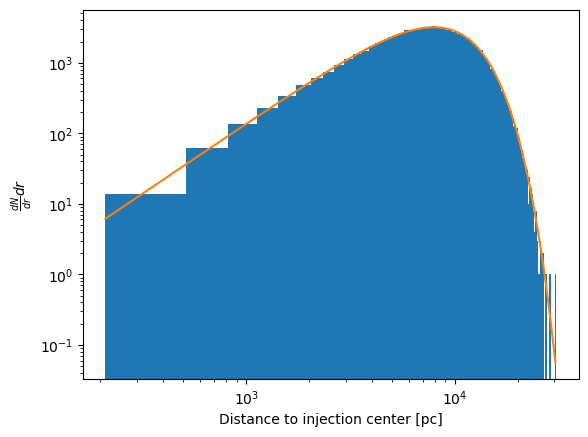

In [132]:
r2 = np.sum(positions**2,axis=1)**0.5
profile = plt.hist(r2,bins=100)
t_tot = dt * n_steps
D = (c_pcyr * dt)**2 / 6 / dt
dr = np.diff(profile[1][:-1])[0]
norm = n_particles * (4*np.pi)**-0.5* (D*t_tot)**-1.5 * dr
r_m = profile[1][:-1]
y_m = norm*r_m**2*np.e**(-r_m**2 / (4*D*t_tot) )
plt.plot(r_m, y_m)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance to injection center [pc]")
plt.ylabel(r"$\frac{dN}{dr}dr$")

In [13]:
import h5py
import numpy as np

# Open the HDF5 file and read the positions dataset
with h5py.File("particle_positions.h5", "r") as hf:
    positions = hf["positions"][:]  # Load the entire dataset into memory

print("Loaded positions array with shape:", positions.shape)


Loaded positions array with shape: (100000, 1000, 3)


Text(0, 0.5, 'Particle number')

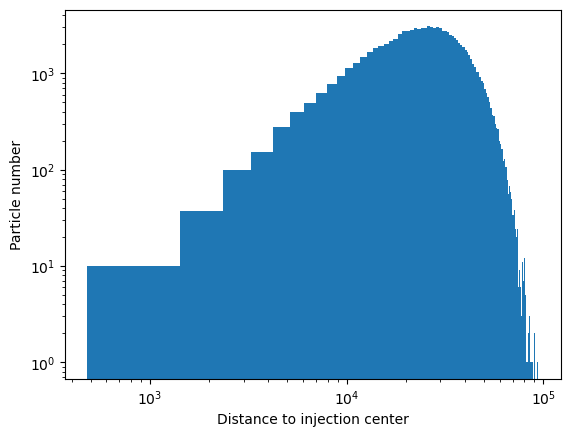

In [21]:
import matplotlib.pyplot as plt

r2 = np.sum(positions[:,-1]**2,axis=1)**0.5
profile = plt.hist(r2,bins=100)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance to injection center")
plt.ylabel("Particle number")

In [23]:
r2.shape

(100000,)

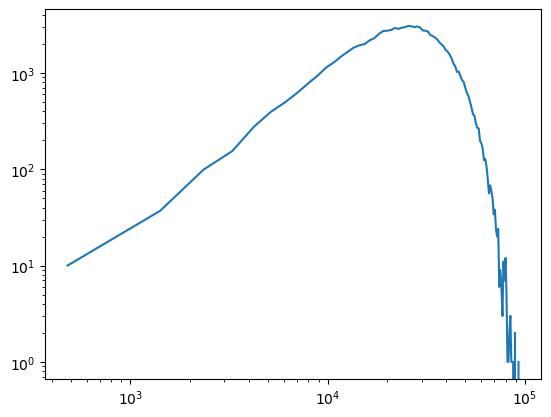

In [25]:
plt.plot(profile[1][:-1],profile[0])
plt.xscale("log")
plt.yscale("log")

In [147]:
import gc
del positions
gc.collect()

68531

In [31]:
rt = np.sum(positions**2,axis=2)**0.5
rt.shape

(100000, 1000)

In [119]:
bins = np.logspace(2,5,91)
N = np.zeros((1000,90))
r = np.zeros((1000,91))
for i in range(1000):
    N[i], r[i] = np.histogram(rt[:,i], bins=bins)

# plt.plot(b[:-1],a)
# plt.xscale("log")
# plt.yscale("log")
# plt.xlim(4e2,1e5)

In [121]:
N[1]

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0., 26396., 73604.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.])

(1e-07, 0.001)

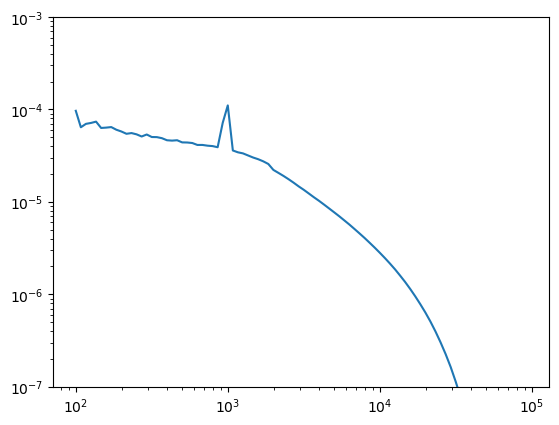

In [145]:
N_ci = np.sum(N, axis = 0)
n_ci = N_ci / (4*np.pi*bins[:-1]**2*np.diff(bins))
plt.plot(r[0,:-1], n_ci)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-7,1e-3)

In [151]:
# Open the HDF5 file and read the positions dataset
with h5py.File("particle_positions_Tstep10.h5", "r") as hf:
    positions = hf["positions"][:]  # Load the entire dataset into memory

print("Loaded positions array with shape:", positions.shape)


Loaded positions array with shape: (100000, 1000, 3)


Text(0, 0.5, 'Particle number')

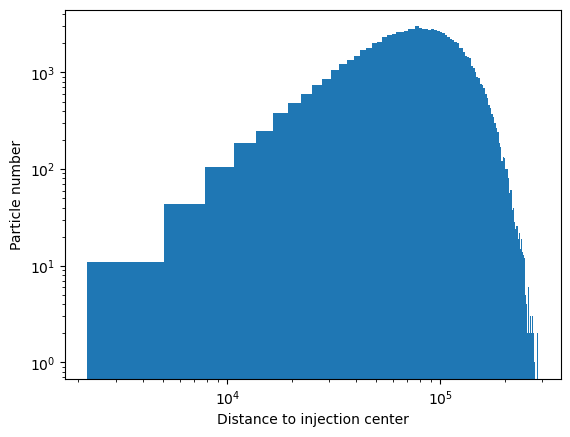

In [153]:
r2 = np.sum(positions[:,-1]**2,axis=1)**0.5
profile = plt.hist(r2,bins=100)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance to injection center")
plt.ylabel("Particle number")

In [155]:
rt = np.sum(positions**2,axis=2)**0.5
del positions
gc.collect()

2039

In [207]:
bins = np.logspace(2,6,121)
N = np.zeros((1000,120))
r = np.zeros((1000,121))
for i in range(1000):
    N[i], r[i] = np.histogram(rt[:,i], bins=bins)

# plt.plot(b[:-1],a)
# plt.xscale("log")
# plt.yscale("log")
# plt.xlim(4e2,1e5)

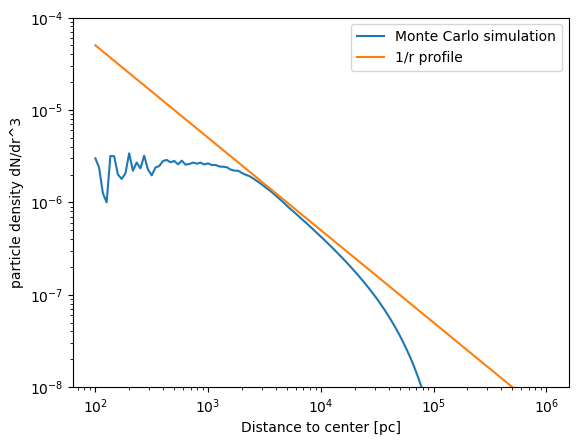

In [239]:
N_ci = np.sum(N, axis = 0)
n_ci = N_ci / (4*np.pi*bins[:-1]**2*np.diff(bins))
plt.plot(r[0,:-1], n_ci, label="Monte Carlo simulation")
y = 5e-3 / bins
plt.plot(bins, y, label="1/r profile")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-8,1e-4)
plt.xlabel("Distance to center [pc]")
plt.ylabel("particle density dN/dr^3")
plt.legend()
plt.savefig("Density_steady_state.png",format = "png")

In [165]:
y

array([1.00000000e-02, 9.26118728e-03, 8.57695899e-03, 7.94328235e-03,
       7.35642254e-03, 6.81292069e-03, 6.30957344e-03, 5.84341413e-03,
       5.41169527e-03, 5.01187234e-03, 4.64158883e-03, 4.29866235e-03,
       3.98107171e-03, 3.68694506e-03, 3.41454887e-03, 3.16227766e-03,
       2.92864456e-03, 2.71227258e-03, 2.51188643e-03, 2.32630507e-03,
       2.15443469e-03, 1.99526231e-03, 1.84784980e-03, 1.71132830e-03,
       1.58489319e-03, 1.46779927e-03, 1.35935639e-03, 1.25892541e-03,
       1.16591440e-03, 1.07977516e-03, 1.00000000e-03, 9.26118728e-04,
       8.57695899e-04, 7.94328235e-04, 7.35642254e-04, 6.81292069e-04,
       6.30957344e-04, 5.84341413e-04, 5.41169527e-04, 5.01187234e-04,
       4.64158883e-04, 4.29866235e-04, 3.98107171e-04, 3.68694506e-04,
       3.41454887e-04, 3.16227766e-04, 2.92864456e-04, 2.71227258e-04,
       2.51188643e-04, 2.32630507e-04, 2.15443469e-04, 1.99526231e-04,
       1.84784980e-04, 1.71132830e-04, 1.58489319e-04, 1.46779927e-04,
      

Text(0, 0.5, 'particle density dN/dr^3')

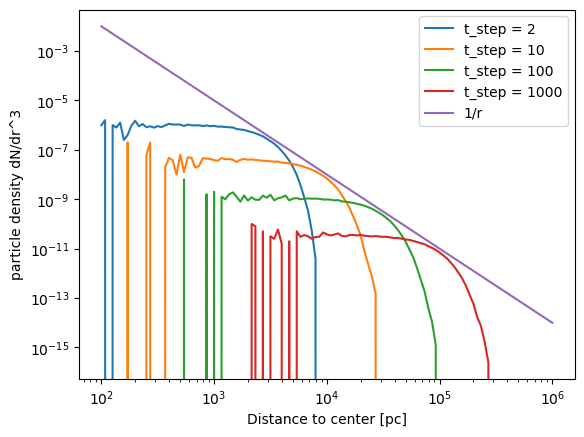

In [251]:
t_lst = [1,9,99,999]
for t in range(len(t_lst)):
    plt.plot(r[t_lst[t],:-1], N[t_lst[t]] / (4*np.pi*bins[:-1]**2*np.diff(bins)) , label="t_step = " + str(t_lst[t]+1))
plt.xscale("log")
plt.yscale("log")
y = 1e4 / bins**3
plt.plot(bins, y, label="1/r")
plt.legend()
plt.xlabel("Distance to center [pc]")
plt.ylabel("particle density dN/dr^3")
# plt.savefig("Number_density_evoluiton.png",format="PNG")

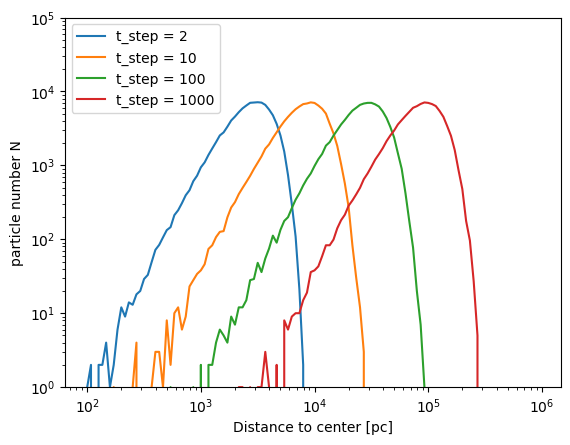

In [230]:
t_lst = [1,9,99,999]
for t in range(len(t_lst)):
    plt.plot(r[t_lst[t],:-1], N[t_lst[t]], label="t_step = " + str(t_lst[t]+1))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e0,1e5)
plt.legend()
plt.xlabel("Distance to center [pc]")
plt.ylabel("particle number N")
plt.savefig("Number_evoluiton.png",format="PNG")

In [275]:
# Open the HDF5 file and read the positions dataset
with h5py.File("particle_positions_Tstep100.h5", "r") as hf:
    positions = hf["positions"][:]  # Load the entire dataset into memory

print("Loaded positions array with shape:", positions.shape)


Loaded positions array with shape: (100000, 1000, 3)


Text(0, 0.5, 'Particle number')

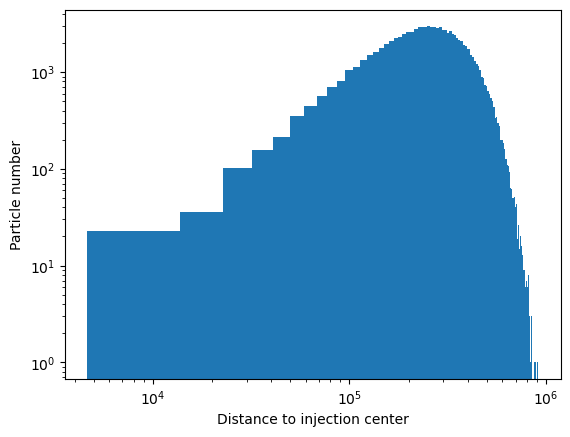

In [255]:
r2 = np.sum(positions[:,-1]**2,axis=1)**0.5
profile = plt.hist(r2,bins=100)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance to injection center")
plt.ylabel("Particle number")

In [277]:
rt = np.sum(positions**2,axis=2)**0.5
del positions
gc.collect()
bins = np.logspace(2,6,81)
N = np.zeros((1000,80))
r = np.zeros((1000,81))
for i in range(1000):
    N[i], r[i] = np.histogram(rt[:,i], bins=bins)

Text(0, 0.5, 'particle number N')

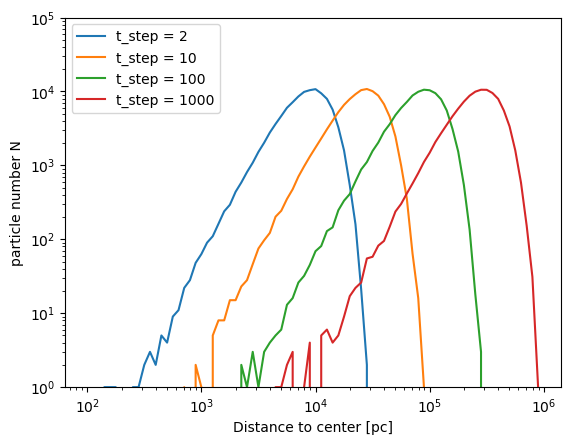

In [279]:
t_lst = [1,9,99,999]
for t in range(len(t_lst)):
    plt.plot(r[t_lst[t],:-1], N[t_lst[t]], label="t_step = " + str(t_lst[t]+1))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e0,1e5)
plt.legend()
plt.xlabel("Distance to center [pc]")
plt.ylabel("particle number N")
# plt.savefig("Number_evoluiton.png",format="PNG")

Text(0, 0.5, 'particle density dN/dr^3')

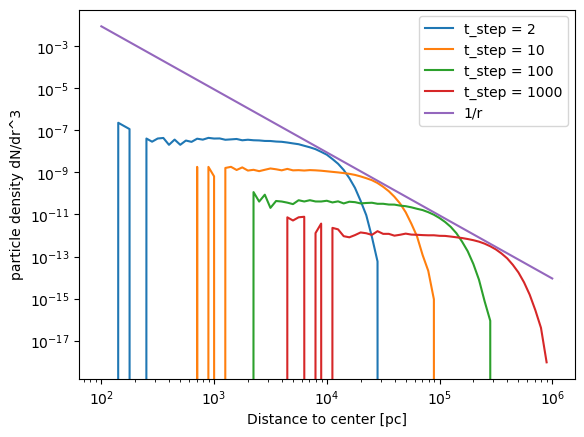

In [281]:
t_lst = [1,9,99,999]
for t in range(len(t_lst)):
    plt.plot(r[t_lst[t],:-1], N[t_lst[t]] / (4*np.pi*bins[:-1]**2*np.diff(bins)) , label="t_step = " + str(t_lst[t]+1))
plt.xscale("log")
plt.yscale("log")
y = 9000 / bins**3
plt.plot(bins, y, label="1/r")
plt.legend()
plt.xlabel("Distance to center [pc]")
plt.ylabel("particle density dN/dr^3")
# plt.savefig("Number_density_evoluiton.png",format="PNG")

In [271]:
bins

array([1.00000000e+02, 1.07977516e+02, 1.16591440e+02, 1.25892541e+02,
       1.35935639e+02, 1.46779927e+02, 1.58489319e+02, 1.71132830e+02,
       1.84784980e+02, 1.99526231e+02, 2.15443469e+02, 2.32630507e+02,
       2.51188643e+02, 2.71227258e+02, 2.92864456e+02, 3.16227766e+02,
       3.41454887e+02, 3.68694506e+02, 3.98107171e+02, 4.29866235e+02,
       4.64158883e+02, 5.01187234e+02, 5.41169527e+02, 5.84341413e+02,
       6.30957344e+02, 6.81292069e+02, 7.35642254e+02, 7.94328235e+02,
       8.57695899e+02, 9.26118728e+02, 1.00000000e+03, 1.07977516e+03,
       1.16591440e+03, 1.25892541e+03, 1.35935639e+03, 1.46779927e+03,
       1.58489319e+03, 1.71132830e+03, 1.84784980e+03, 1.99526231e+03,
       2.15443469e+03, 2.32630507e+03, 2.51188643e+03, 2.71227258e+03,
       2.92864456e+03, 3.16227766e+03, 3.41454887e+03, 3.68694506e+03,
       3.98107171e+03, 4.29866235e+03, 4.64158883e+03, 5.01187234e+03,
       5.41169527e+03, 5.84341413e+03, 6.30957344e+03, 6.81292069e+03,
      

In [287]:
bins = np.linspace(0,1e6,101)
N = np.zeros((1000,100))
r = np.zeros((1000,101))
for i in range(1000):
    N[i], r[i] = np.histogram(rt[:,i], bins=bins)

Text(0, 0.5, 'particle number N')

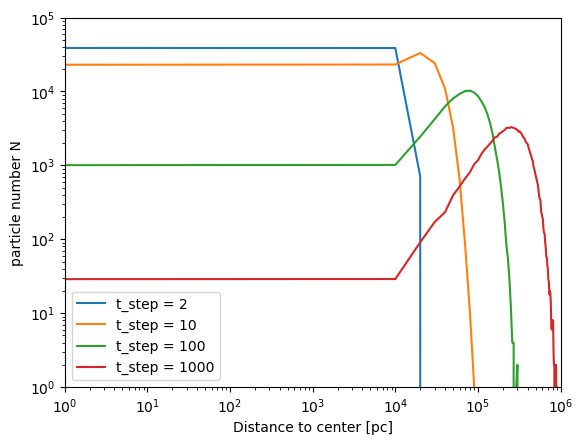

In [297]:
t_lst = [1,9,99,999]
for t in range(len(t_lst)):
    plt.plot(r[t_lst[t],:-1], N[t_lst[t]], label="t_step = " + str(t_lst[t]+1))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e0,1e5)
plt.xlim(1e0,1e6)
plt.legend()
plt.xlabel("Distance to center [pc]")
plt.ylabel("particle number N")
# plt.savefig("Number_evoluiton.png",format="PNG")

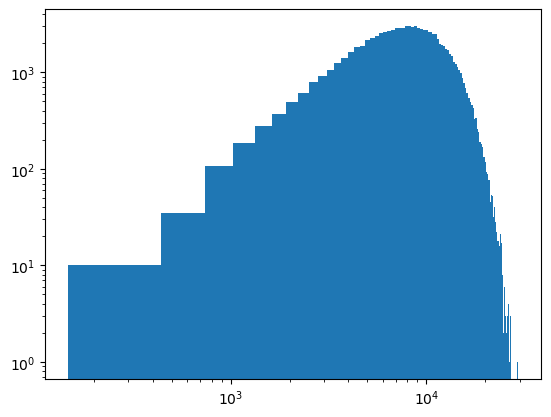

In [309]:
plt.hist(rt[:,1],bins=100)
plt.xscale("log")
plt.yscale("log")
